In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


## Average (Mean)

In [2]:
values = make_array(2, 3, 3, 9)

In [3]:
sum(values) / len(values), np.average(values), np.mean(values)

(4.25, 4.25, 4.25)

In [4]:
(2 + 3 + 3 + 9) / 4

4.25

In [5]:
2 * (1/4) + 3 * (2/4) + 9 * (1/4)

4.25

In [6]:
2 * 0.25 + 3 * 0.5 + 9 * 0.25

4.25

In [7]:
values_table = Table().with_columns('Value', values)
values_table

Value
2
3
3
9


In [8]:
bins_for_display = np.arange(0.5, 10.6, 1)

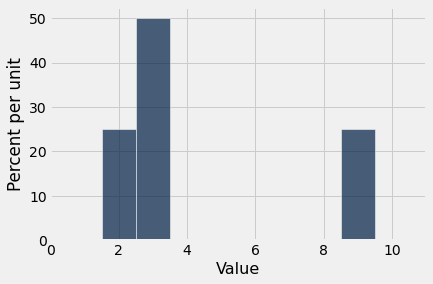

In [9]:
values_table.hist(bins = bins_for_display, ec = 'w')

In [10]:
2 * np.ones(10)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [11]:
twos = 2 * np.ones(10)
threes = 3 * np.ones(20)
nines = 9 * np.ones(10)

In [12]:
new_values = np.append(np.append(twos, threes), nines)

In [13]:
len(new_values)

40

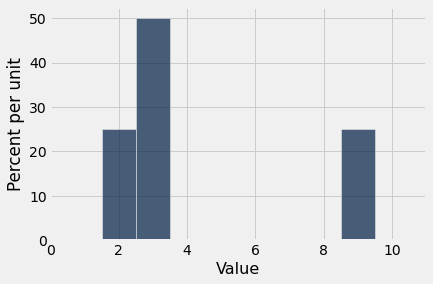

In [14]:
new_values_table = Table().with_column('Value', new_values)
new_values_table.hist(bins = bins_for_display)

In [15]:
np.average(new_values), np.average(values)

(4.25, 4.25)

## The Average and the Median

In [16]:
#nba = Table.read_table('nba2013.csv')
nba = Table.read_table('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


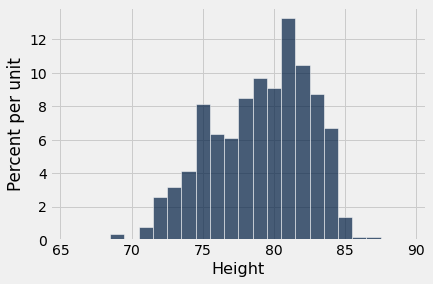

In [17]:
nba.hist('Height', bins=np.arange(65.5, 90.5), ec='w')

In [18]:
heights = nba.column('Height')
percentile(50, heights), np.average(heights)

(80, 79.06534653465347)

## Standard Deviation

In [19]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [20]:
average = np.average(values)
average

4.25

In [21]:
deviations = values - average
sd_table = sd_table.with_column('Deviations', deviations)
sd_table

Value,Deviations
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [22]:
sum(deviations)

0.0

In [23]:
sd_table = sd_table.with_column('Squared Deviation', deviations ** 2)
sd_table

Value,Deviations,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [24]:
# Variance of the data is the average of the squared deviations

variance = np.average(sd_table.column('Squared Deviation'))
variance

7.6875

In [25]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [26]:
np.std(values)

2.7726341266023544

## Chebyshev's Bounds

In [30]:
births = Table.read_table('baby.csv')

In [31]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


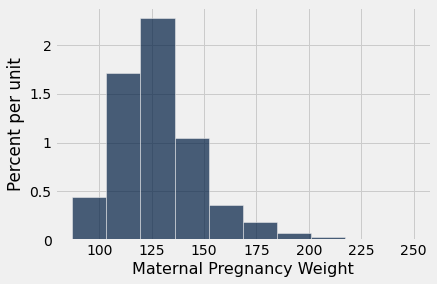

In [32]:
births.hist('Maternal Pregnancy Weight')

In [33]:
mpw = births.column('Maternal Pregnancy Weight')
average = np.average(mpw)
sd = np.std(mpw)
average, sd

(128.4787052810903, 20.72544970428041)

In [34]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(average - 3*sd, average + 3*sd))

In [35]:
within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [36]:
# Chebyshev's bound for the proportions in the range "average plus or minus 3 SDs"
# is at Least

1 - 1/3**2

0.8888888888888888

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

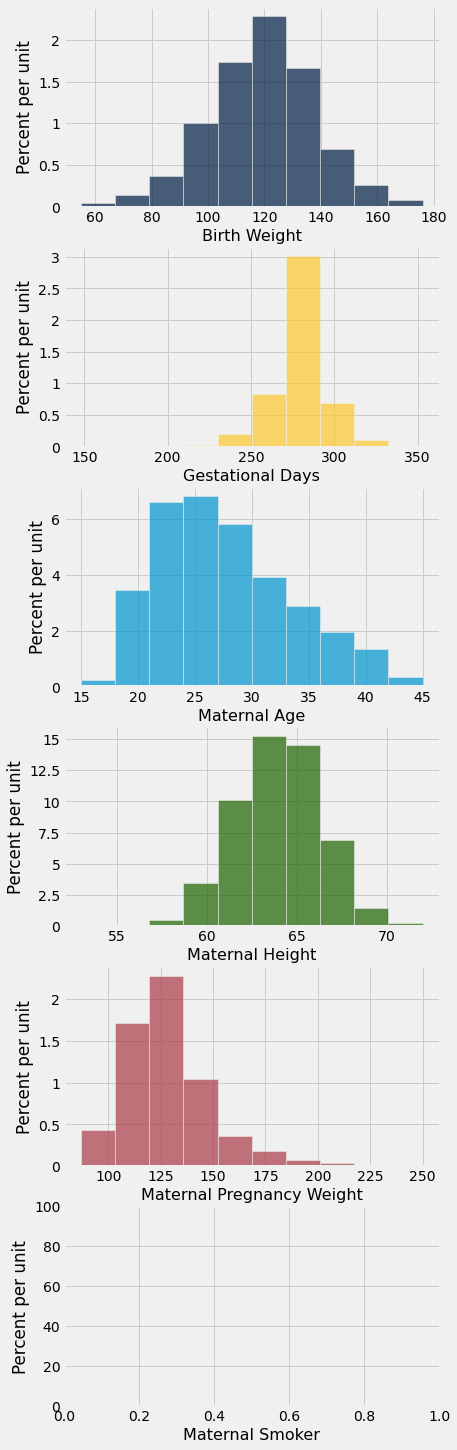

In [37]:
births.hist(overlay = False)

In [40]:
# See if Chebyshev's bounds work
# for different shapes of distributions

for k in births.labels:
    values = births.column(k)
    average = np.average(values)
    sd = np.std(values)
    print()
    print(k)
    for z in np.arange(2, 6):
        chosen = births.where(k, are.between(average - z*sd, average + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')


Birth Weight
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 5 SDs: 99.91 %

Maternal Smoker
Average plus or minus 2 SDs: 100.0 %
Average plus or minus 3 SDs: 100.0 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %
